In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import glob
import os
import cv2
import torch
import copy
import torch.utils.data
import matplotlib.patches as patches
from torchvision import transforms
from skimage.feature import corner_harris, corner_peaks
import collections
import random
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
import keras
from keras import *
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from skimage import *
import skimage


In [30]:
print(os.listdir("Retinal/"))
imageSize=224

['train', 'test']


In [31]:
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['images']:
                label = 0
            elif folderName in ['manual']:
                label = 1
            elif folderName in ['mask']:
                label = 2
            else:
                label = 4
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [32]:
test_dir = "Retinal/test/"

In [33]:
X_test, y_test= get_data(test_dir)

  0%|          | 0/45 [00:00<?, ?it/s]/home/nebex/usys/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/nebex/usys/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████| 45/45 [00:13<00:00,  3.35it/s]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2)

In [35]:
y_trainHot = to_categorical(y_train, num_classes = 3)
y_testHot = to_categorical(y_test, num_classes = 3)

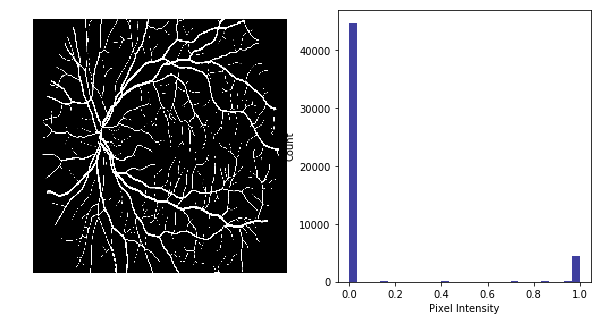

In [37]:
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

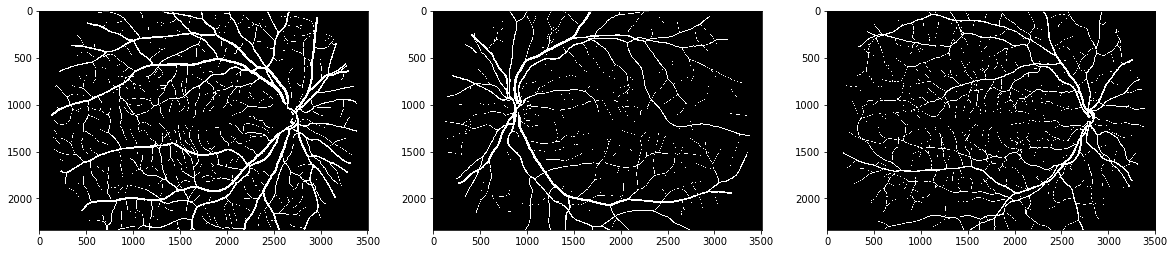

In [44]:
multipleImages = glob.glob('Retinal/train/manual/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
plotThreeImages(multipleImages)


Normal


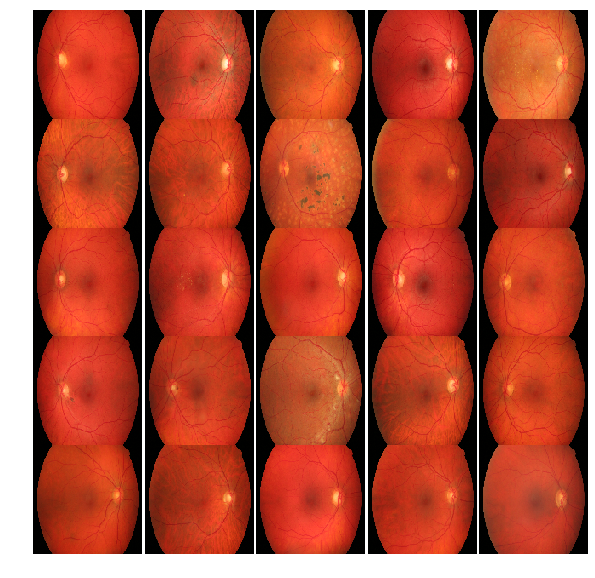

In [47]:
print("Normal")
multipleImages = glob.glob('Retinal/train/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1)#.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1